## Case Study: Cryptocurrency

As evident all around us, cryptocurrency has been on the rise and it seems that there is no telling where this bull market will take us.
On one side of the coin, many are predicting that the bull market is here to stay due to the change in perception of how people viewed cryptocurrency in the past and how it is much more relevant today than it was. 
On the flipside, the naysayers are predicting that history is bound to repeat itself and what happened in 2017's crypto winter will be seen once more.

In the following segments, I will evaluate the peak marketcap from dec 2017 against a dataset exactly one year from it.

Queries to be answered:
1. What were the top 10 cryptocurrencies in Dec 2017?
2. How did the top 10 cryptocurrencies compare in 2018?
     - Are they still within the top 10 cryptocurrencies?
     - Are they still listed? If not, what are their current standing?
3. Are Ethereum and Bitcoin the blue chips of cryptocurrency?
     - What was the marketshare of bitcoin and ethereum in 2017 and 2018?
     - Comparing the coins between 2017 to 2018, how significant were the price movement?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

crypto_hist = pd.read_csv('historical.csv')
print(crypto_hist.info(verbose = True, show_counts = True)) # dataset check

# Why are there missing values for marketcap column? Explore missing values
# Further research yielded that at that point of time, those coins market caps were insignificant.
crypto_hist = crypto_hist.dropna(subset = ['market_cap'])
crypto_hist['date'] = pd.to_datetime(crypto_hist['date']) #changing 'date' column to date datatype
crypto_hist['market_cap'] = crypto_hist['market_cap'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441972 entries, 0 to 4441971
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   date                4441972 non-null  object 
 1   coin_id             4441972 non-null  int64  
 2   cmc_rank            4441972 non-null  int64  
 3   market_cap          3900714 non-null  float64
 4   price               4441972 non-null  float64
 5   open                4399423 non-null  float64
 6   high                4399423 non-null  float64
 7   low                 4399423 non-null  float64
 8   close               4399423 non-null  float64
 9   time_high           4392120 non-null  object 
 10  time_low            4399421 non-null  object 
 11  volume_24h          4441972 non-null  float64
 12  percent_change_1h   4437500 non-null  float64
 13  percent_change_24h  4389932 non-null  float64
 14  percent_change_7d   4350693 non-null  float64
 15  circulating_sup

In [25]:
coins = pd.read_csv('coins.csv')
coins.info()
history = crypto_hist.merge(coins, left_on = 'coin_id', right_on = 'id') #Merging crypto and history dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8927 entries, 0 to 8926
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8927 non-null   int64  
 1   name           8927 non-null   object 
 2   slug           8927 non-null   object 
 3   symbol         8927 non-null   object 
 4   status         8927 non-null   object 
 5   category       8869 non-null   object 
 6   description    8667 non-null   object 
 7   subreddit      2641 non-null   object 
 8   notice         204 non-null    object 
 9   tags           3754 non-null   object 
 10  tag_names      3747 non-null   object 
 11  website        8506 non-null   object 
 12  twitter        7488 non-null   object 
 13  message_board  3684 non-null   object 
 14  chat           6504 non-null   object 
 15  explorer       8453 non-null   object 
 16  reddit         2641 non-null   object 
 17  technical_doc  4165 non-null   object 
 18  source_c

In [26]:
dec_2017 = history[history['date'] == '2017-12-16']
dec_2017 = dec_2017[['coin_id', 'name', 'market_cap', 'price']]
dec_2017 = dec_2017.reset_index(drop = True)

dec_2018 = history[history['date'] == '2018-12-16']
dec_2018 = dec_2018[['coin_id', 'name', 'market_cap', 'price']]
dec_2018 = dec_2018.reset_index(drop = True)

In [27]:
dec_2017 = dec_2017.sort_values('market_cap', ascending = False)
dec_2018 = dec_2018.sort_values('market_cap', ascending = False)

top10_2017 = dec_2017.head(10)
top10_2018 = dec_2018.head(10)

#### <u> Identifying top 10 coins for both 2017 and 2018 based on market cap </u>

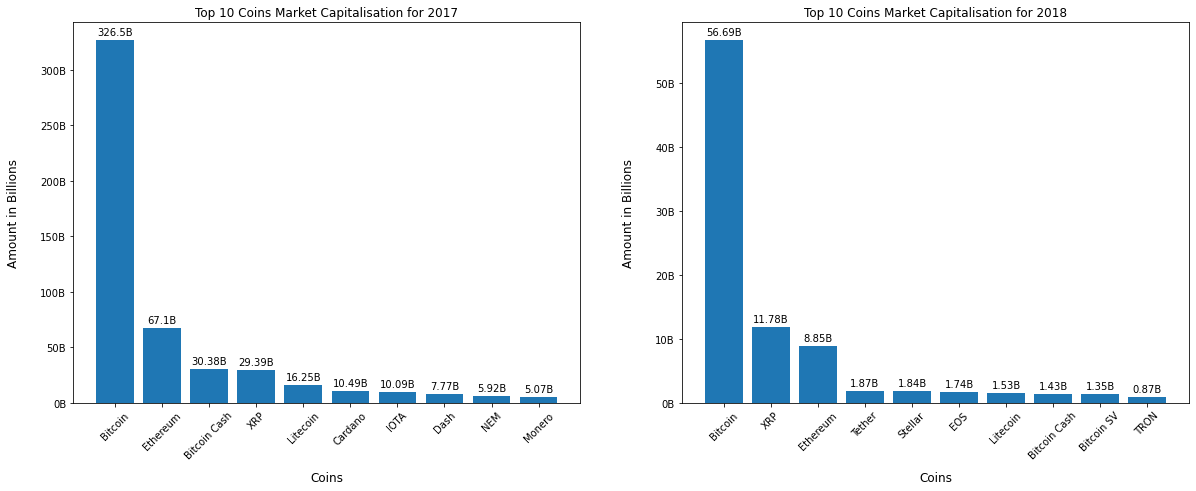

In [28]:
top_title = 'Top 10 Coins Market Capitalisation for '

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

bar_2017 = ax[0].bar(top10_2017['name'], top10_2017['market_cap']/1000000000)
ax[0].set_title(top_title+'2017')
ax[0].tick_params(axis = 'x', labelrotation = 45)
ax[0].set_yticks([0,50,100,150,200,250,300])
ax[0].set_yticklabels(['0B','50B','100B','150B','200B','250B','300B'])

label_2017 = [f'{round(x/1000000000,2)}B' for x in top10_2017['market_cap'].tolist()]
ax[0].bar_label(bar_2017, label_2017, padding = 3)
ax[0].set_ylabel('Amount in Billions', labelpad = 20, fontsize = 12)
ax[0].set_xlabel('Coins', labelpad = 10, fontsize = 12)

bar_2018 = ax[1].bar(top10_2018['name'], top10_2018['market_cap']/1000000000)
ax[1].set_title(top_title+'2018')
ax[1].tick_params(axis = 'x', labelrotation = 45)
ax[1].set_yticks([0,10,20,30,40,50])
ax[1].set_yticklabels(['0B','10B','20B','30B','40B','50B'])

label_2018 = [f'{round(x/1000000000,2)}B' for x in top10_2018['market_cap'].tolist()]
ax[1].bar_label(bar_2018, label_2018, padding = 3)
ax[1].set_ylabel('Amount in Billions', labelpad = 20, fontsize = 12)
ax[1].set_xlabel('Coins', labelpad = 10, fontsize = 12)

plt.show()

#### <u> Identifying 2017 top 10 coins that remained in 2018 top 10 coins </u>

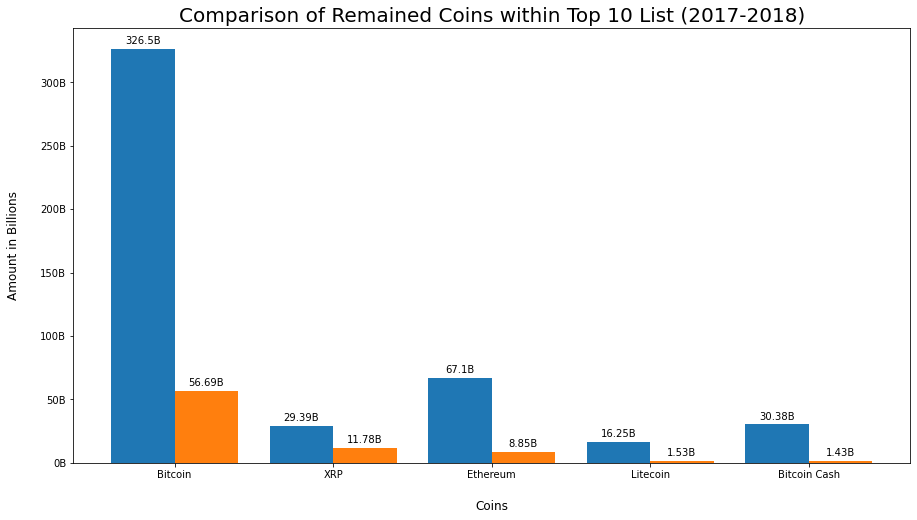

In [29]:
import numpy as np

top10_2017 = top10_2017.rename(columns = {'market_cap':'market_cap_2017', 'price':'price_2017'})
top10_2018 = top10_2018.rename(columns = {'market_cap':'market_cap_2018', 'price':'price_2018'})

inner_coins = top10_2017.merge(top10_2018, how = 'inner', left_on = 'coin_id', right_on = 'coin_id')
inner_coins.pop('name_y')
inner_coins = inner_coins.rename(columns = {'name_x':'name'})
inner_coins = inner_coins.sort_values('market_cap_2018', ascending = False)

fig, ax = plt.subplots(figsize=(15,8))

x = np.arange(len(inner_coins))
width = 0.40

bar_2017 = ax.bar(x-width/2, inner_coins['market_cap_2017']/1000000000, width = 0.4, label='2017')
bar_2018 = ax.bar(x+width/2, inner_coins['market_cap_2018']/1000000000, width = 0.4, label='2018')
ax.set_xticks(x)
ax.set_xticklabels(inner_coins['name'].tolist())
ax.set_yticks([0,50,100,150,200,250,300])
ax.set_yticklabels(['0B','50B','100B','150B','200B','250B','300B'])

label_2017 = [f'{round(x/1000000000,2)}B' for x in inner_coins['market_cap_2017'].tolist()]
label_2018 = [f'{round(x/1000000000,2)}B' for x in inner_coins['market_cap_2018'].tolist()]

ax.bar_label(bar_2017, label_2017, padding = 3)
ax.bar_label(bar_2018, label_2018, padding = 3)
ax.set_title('Comparison of Remained Coins within Top 10 List (2017-2018)', fontsize = 20)
ax.set_ylabel('Amount in Billions', labelpad = 20, fontsize = 12)
ax.set_xlabel('Coins', labelpad = 20, fontsize = 12)

plt.show()

In [30]:
top10_2017 = top10_2017.sort_values('market_cap_2017', ascending = False)
top10_2018 = top10_2018.sort_values('market_cap_2018', ascending = False)

remain_coins = top10_2017[~top10_2017['coin_id'].isin(top10_2018['coin_id'])]
remain_coins_percent = (remain_coins['coin_id'].count()/top10_2017['coin_id'].count())*100

print(f'Between 2018 and 2017, {remain_coins_percent}% of the coins fell out of the top 10 position')

Between 2018 and 2017, 50.0% of the coins fell out of the top 10 position


In [31]:
dec_2017 = dec_2017.sort_values('market_cap', ascending = False)
dec_2018 = dec_2018.sort_values('market_cap', ascending = False)

dec_2017 = dec_2017.reset_index(drop=True)
dec_2018 = dec_2018.reset_index(drop=True)

dec_2017 = dec_2017.reset_index()
dec_2018 = dec_2018.reset_index()

dec_2017 = dec_2017.rename(columns = {'index':'market_cap_pos'})
dec_2018 = dec_2018.rename(columns = {'index':'market_cap_pos'})

#### <u> Identifying the 2018 market cap positions of coins that fell out of 2017 top 10 </u>

In [32]:
remain_coins_list = [x for x in remain_coins['coin_id'].tolist()]
remain_coins2017 = dec_2017[dec_2017['coin_id'].isin(remain_coins_list)]
remain_coins2018 = dec_2018[dec_2018['coin_id'].isin(remain_coins['coin_id'])]

diff_rank = remain_coins2017.merge(remain_coins2018, left_on = 'coin_id', right_on = 'coin_id')
diff_rank['positions_dropped'] = diff_rank['market_cap_pos_y'] - diff_rank['market_cap_pos_x']
diff_rank = diff_rank.rename(columns = {'market_cap_pos_x':'market_cap_pos_2017', 'market_cap_pos_y':'market_cap_pos_2018', 'market_cap_x':'market_cap_2017', 'market_cap_y':'market_cap_2018', 'price_x':'price_2017', 'price_y':'price_2018', 'name_y':'name'})
diff_rank.pop('name_x')
diff_rank = diff_rank[['coin_id', 'name', 'price_2017', 'price_2018', 'market_cap_2017', 'market_cap_2018', 'market_cap_pos_2017', 'market_cap_pos_2018', 'positions_dropped']]
diff_rank

,coin_id,name,price_2017,price_2018,market_cap_2017,market_cap_2018,market_cap_pos_2017,market_cap_pos_2018,positions_dropped
0,2010,Cardano,0.404665,0.029103,10491789415,754560639,5,10,5
1,1720,IOTA,3.628937,0.222483,10086740303,618399305,6,12,6
2,131,Dash,1001.510925,63.142616,7769122490,537290072,7,15,8
3,873,NEM,0.657999,0.060641,5921989738,545768095,8,14,6
4,328,Monero,327.320740,39.339487,5067504499,655016344,9,11,2


#### <u> Identifying BTC/ETH marketshare against entire crypto space in both 2017 and 2018 </u>

/var/folders/11/y3v53f_n68b_cjd52zqry01m0000gn/T/ipykernel_4001/2802274152.py:21: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[0].pie(coins_break_2017, explode, cap_per_labels, autopct = '%1.2f%%', shadow = True, startangle = 90)
/var/folders/11/y3v53f_n68b_cjd52zqry01m0000gn/T/ipykernel_4001/2802274152.py:22: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[1].pie(coins_break_2018, explode, cap_per_labels, autopct = '%1.2f%%', shadow = True, startangle = 90)


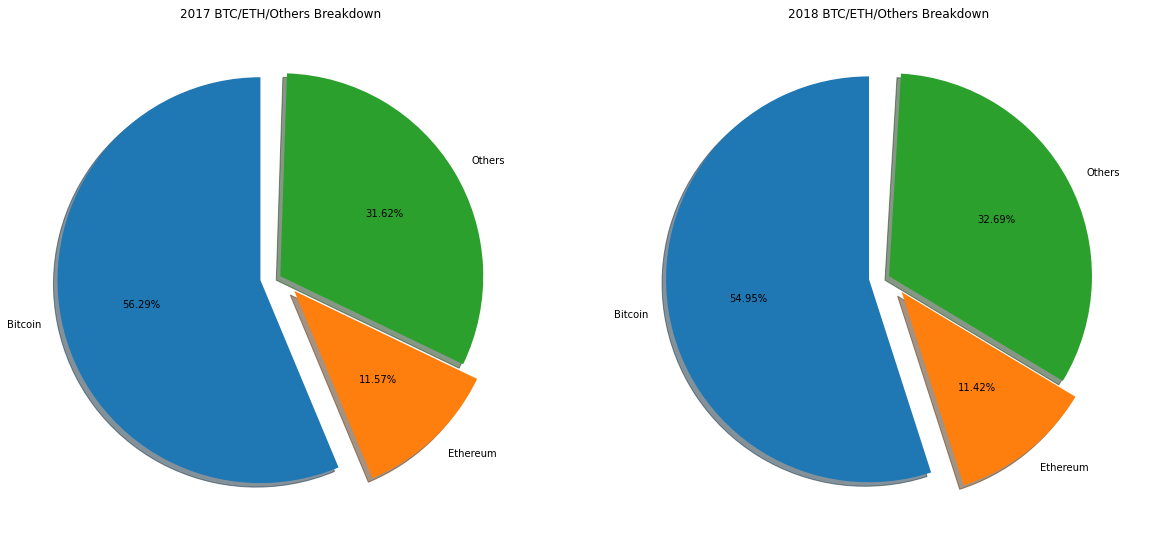

In [33]:
dec_2017['market_per'] = round(dec_2017['market_cap']/dec_2017['market_cap'].sum(),4)
dec_2018['market_per'] = round(dec_2018['market_cap']/dec_2018['market_cap'].sum(),4)

cap_per_labels = ['Bitcoin', 'Ethereum', 'Others']

bit_eth_2017 =  [x for x in dec_2017.iloc[0:2,-1]]
others_2017 = [x for x in dec_2017.iloc[2:,-1]]
others_2017 = sum(others_2017)
bit_eth_2017.append(others_2017)
coins_break_2017 = bit_eth_2017

bit_eth_2018 =  [x for x in dec_2018.iloc[0:2,-1]]
others_2018 = [x for x in dec_2018.iloc[2:,-1]]
others_2018 = sum(others_2018)
bit_eth_2018.append(others_2018)
coins_break_2018 = bit_eth_2018

explode = (0.1, 0.1, 0)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].pie(coins_break_2017, explode, cap_per_labels, autopct = '%1.2f%%', shadow = True, startangle = 90)
ax[1].pie(coins_break_2018, explode, cap_per_labels, autopct = '%1.2f%%', shadow = True, startangle = 90)

ax[0].set_title('2017 BTC/ETH/Others Breakdown')
ax[1].set_title('2018 BTC/ETH/Others Breakdown')

plt.show()

#### <u> Identifying price movement of coins between 2017 and 2018 </u>

In [34]:
dec_merged = dec_2017.merge(dec_2018, left_on = 'coin_id', right_on = 'coin_id')

dec_merged = dec_merged.astype({'price_x':'int64', 'price_y':'int64'})
dec_merged['price_per_change'] = (dec_merged['price_y']-dec_merged['price_x'])/dec_merged['price_x']

dec_merged = dec_merged[['coin_id', 'name_x', 'price_x', 'price_y', 'price_per_change']]
dec_merged = dec_merged[(dec_merged['price_x'] != 0) & (dec_merged['price_y'] != 0)]
dec_merged['average_price_move'] = dec_merged['price_per_change'].sum()/dec_merged['price_per_change'].count()
dec_merged = dec_merged.rename(columns = {'name_x':'name', 'price_x':'price_2017', 'price_y':'price_2018'})
dec_merged

,coin_id,name,price_2017,price_2018,price_per_change,average_price_move
0,1,Bitcoin,19497,3252,-0.833205,-0.588496
1,1027,Ethereum,696,85,-0.877874,-0.588496
2,1831,Bitcoin Cash,1801,81,-0.955025,-0.588496
4,2,Litecoin,298,25,-0.916107,-0.588496
7,131,Dash,1001,63,-0.937063,-0.588496
...,...,...,...,...,...,...
675,954,bitEUR,1,1,0.000000,-0.588496
692,778,bitGold,1478,836,-0.434371,-0.588496
702,1840,300 Token,375,186,-0.504000,-0.588496
740,1743,KingN Coin,17,6,-0.647059,-0.588496


### Observations
1. As forementioned, only 50% of the top 10 coins in 2017 remained in top 10 coins of 2018 <br> - However, in terms of market cap positioning, the fallen coins only fell between 2-8 positions, allowing them to retain a position in top 20

2. For Eth and Btc, their combined marketshare percentage with respect to entire cryptocurrency marketcap percentage were more than 80% in both 2017 and 2018, making them the dominant coins in the space. <br> - Despite so, can they be considered as blue chips of the crypto space? When comparing the price movement between the years, BTC and ETH fell by 83.3% and 87.7% respectively while the average drop across the crypto space was only 58.8% .